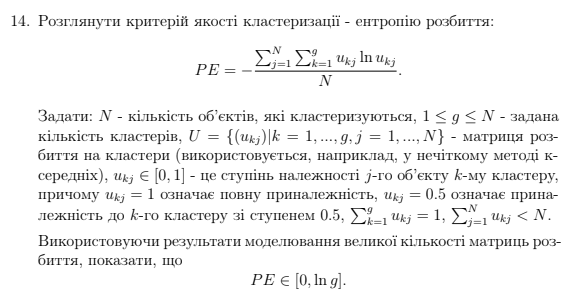

In [1]:
import numpy as np

In [2]:
def U_init(g, N):
    
    U_mask = np.random.randint(0, 2, size = (g, N))

    U_non = np.random.rand(g, N) * U_mask             #create non-normalized U

    num_sum = np.sum(U_non, axis=0)

    for i in range(N):                                # 
        if num_sum[i] == 0:
            U_non[np.random.randint(0, g), i] = 1
            num_sum[i] = 1 

    U = U_non / num_sum
        
    
    return U

In [3]:
N = np.random.randint(1, 100)
g = np.random.randint(1, N+1)
num = 100                           #the number of created matrices 

entropy = np.array([])

np.seterr(divide = 'ignore')

for _ in range(num):
    U = U_init(g, N)
    log_U = np.where(U==0, 0, np.log(U))
    PE = - np.sum(U * log_U) / N
    
    entropy = np.append(entropy, PE)
    
np.seterr(divide = 'warn')

print("g =", g)
print("ln g = ", np.log(g))    
print("PE ϵ [0, ln g]:", np.all(entropy <= np.log(g)))
print("Ентропія розбиття для усіх {} матриць:".format(num))
print(entropy)

g = 16
ln g =  2.772588722239781
PE ϵ [0, ln g]: True
Ентропія розбиття для усіх 100 матриць:
[1.8271875  1.90136259 1.91380217 1.85734916 1.95564015 1.86039074
 1.86780101 1.85817227 1.84114636 1.876909   1.81868038 1.80637953
 1.85658822 1.77869788 1.8635816  1.81245856 1.86964274 1.86690859
 1.83393042 1.90720915 1.94969151 1.87009495 1.82984262 1.85393029
 1.86499822 1.80297362 1.89715527 1.88119936 1.81722523 1.91879784
 1.86235333 1.90845547 1.8519552  1.86351325 1.90371394 1.85199378
 1.82941746 1.73506454 1.93260776 1.88380975 1.81720318 1.92989589
 1.82447432 1.87471873 1.82076582 1.83574629 1.81340837 1.94183352
 1.85748993 1.87833575 1.85200992 1.82851888 1.86532742 1.8022943
 1.85200996 1.84653716 1.85523319 1.84711878 1.87011648 1.92513272
 1.8503237  1.81135029 1.8672519  1.9194482  1.8353889  1.86934236
 1.85558052 1.88920693 1.88139641 1.89036162 1.83471815 1.86632254
 1.83939203 1.98084164 1.86425716 1.84793979 1.88025062 1.88344537
 1.91343783 1.82946013 1.82862993 1.

#### Отже, як бачимо, з отриманого результату при генерації великої кількості матриць розбиття, критерій якості кластеризаії - ентропія розбиття знаходиться в межах $PE \in [0, ln g]$ 